## Desafio EBAC - Módulo 10

Vamos explorar dados de crédito presentes no arquivo Profissão Analista de dados M10 Pratique Material de apoio.xlsx. Os dados estão no formato de Excel (XLSX) e contém informações sobre clientes de uma instituição financeira. Em especial, estamos interessados em explicar a segunda coluna, chamada de default, que indica se um cliente é adimplente (default = 0), ou inadimplente (default = 1), ou seja, queremos entender o porquê um cliente deixa de honrar com suas dívidas baseado no comportamento de outros atributos, como salário, escolaridade e movimentação financeira. Segue uma descrição completa dos atributos:



Faça o download do arquivo Profissão Analista de dados M10 Exercício Material de apoio.xlsx com a célula de código indicada no material de apoio.

### 1º Exercício: Excel para CSV

Utilizando o pacote Python openpyxl, extraia as colunas id, sexo e idade para os clientes inadimplentes (default = 1 ) e solteiros (estado_civil = 'solteiro'). 

Salve os dados extraídos no arquivo csv “credito.csv” separado por ; . 

Dica: O arquivo credito.csv deve ter 669 linhas, contando com o cabeçalho. 

Obs: Escreva o código da sua solução em uma ou mais células. Você não precisa enviar o arquivo csv gerado. Encaminhe à equipe de tutoria o código com a solução do exercício.

Relembre

Ficou com dúvidas sobre como extrair as colunas filtrando clientes inadimplentes e solteiros?

Realize a extração de cada coluna separadamente e depois junte quando for salvar no arquivo CSV. Você vai precisar:

1) Criar índices para as colunas:

 id
sexo
idade
inadimplência (default)
estado civil (estado_civil)
2) Extrair a coluna de ‘id’ dos clientes inadimplentes e solteiros. Em seguida, vai realizar o mesmo procedimento para a coluna ‘sexo’ e ‘idade’. Tenha como base o exemplo ‘Média dos saldos’ que estudamos anteriormente.

3) Quando for fazer o filtro dos clientes inadimplentes e solteiros, inclua no código de extração da coluna, dentro da estrutura condicional ‘if’, as condições:

(linha[indice_default] == 1) e (linha[indice_estado_civil] == 'solteiro')
Ficou com dúvidas sobre como salvar os dados no arquivo CSV?

Caso tenha seguido a nossa sugestão para a extração de cada coluna em variáveis diferentes, quando for salvar os dados, utilize as três variáveis para compor o arquivo CSV. Como no exemplo da aula: 



A parte indicada pela seta laranja é a escrita do cabeçalho, no exemplo é o nome de uma coluna, no caso do seu exercício serão os nomes das três colunas.

A parte destacada em azul é a função recebida como parâmetro para ser aplicada a todos os elementos da coleção (destacado em amarelo). Essa função só está estruturando os dados nesse formato de lista. No caso do exercício do módulo 10, a estrutura será uma lista com três parâmetros. Exemplo: [id, sexo, idade].

A parte destacada em amarelo é a coleção de dados que a função ‘map’ utiliza para aplicar a função lambda. No caso, a função ‘map’ vai receber as três variáveis que contém os dados extraídos.

Obs.: se a parte da função ‘map’ ainda estiver muito confusa, revisite as aulas do módulo 5. 

### 2º Exercício: Excel para JSON

Como preparação para o próximo módulo, vamos trabalhar com o JSON, um formato semi-estruturado, muito utilizado em transmissão de dados da web e equivalente a um dicionário Python. 

Utilizando o pacote Python openpyxl, extraia os dados das colunas “escolaridade” e “tipo_cartao”, removendo duplicados. Com os dados, construa o dicionário Python “crédito” com a estrutura indicada no material de apoio.

Para finalizar, utilize o código indicado no material de apoio para converter o dicionário “crédito” no formato JSON.

Dica: Sua solução deve gerar o dicionário Python “crédito” igual ao exemplo, mas a ordem dos elementos pode variar tranquilamente. Uma excelente forma de remover elementos duplicados de uma lista é convertê-la para “set” e depois para “list” novamente. Encaminhe à equipe de tutoria o código com a solução do exercício.

#### Exercício 1
---
O primeiro passo é ler o arquivo excel através da lib openpyxl. Para isso é necessário instalar a biblioteca caso ela não esteja instalada.


In [ ]:
!python -m pip install openpyxl


In [ ]:
from openpyxl import load_workbook
# Usando barras duplas
wb = load_workbook("C:\\Users\\z004hk9e\\OneDrive - Siemens Healthineers\\Documents\\EBAC\\DESAFIOS\\Dados_Desafio_4\\Profissao Analisa de dados M10 Pratique Material de apoio.xlsx")



Poderíamos simplesmente abrir o excel e ver o que tem dentro dele, mas vamos fazer isso via terminal.

In [ ]:
wb.sheetnames

A biblioteca openpyxl não tem a mesma praticidade do pandas, então para visualizar nossa data temos que realizar uma função interadora

In [ ]:
def print_rows(sheet):
    for row in sheet.active.iter_rows(values_only=True):
       print(row)

print_rows(wb)

Agora é necessário criar o .csv, porém eu quero criar uma função que transforma um arquivo excel em .csv para que o código fique mais modularizado.

In [ ]:
import csv

def create_csv(csv_file_name: str, excel_sheet_file):
    # Cria um .csv com delimitador ;
    with open(csv_file_name + ".csv", 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=';')
    
    # interação com as linhas do excel para escrever o csv, quase mesma interação da leitura anterior
        for row in excel_sheet_file.iter_rows(values_only=True):
            csvwriter.writerow(row)



In [ ]:
sheet = wb.active
create_csv('credito_all', sheet)

Agora que já possuimos o esqueleto da coisa, vamos filtrar os dados, queremos apenas solteiros e inadimplentes. Para isso vamos fazer um filtro nas colunas.

In [ ]:
colunas_filtradas = ["id","sexo","idade"]
with open("credito_all.csv", "r", encoding="utf-8") as f_in,open("credito.csv", "w", newline="", encoding="utf-8") as f_out:
    reader = csv.DictReader(f_in,delimiter=';')
    write = csv.DictWriter(f_out, fieldnames=colunas_filtradas, delimiter=';')
    #escrevendo mesmo cabeçalho
    write.writeheader()
    #Utilizo lambda no lugar de um if para filtrar meus dados
    linhas_filtradas = filter(
    lambda row: row["default"] == "1" and row["estado_civil"].lower() == "solteiro",
    reader )
    #delimitando as colunas dentro do filtro anterior
    linhas_transformadas = map(
    lambda row: {col: row[col] for col in colunas_filtradas},
    linhas_filtradas)
    
    for row in linhas_transformadas:
        write.writerow(row)


O execício 1 acaba aqui, porém é possivel melhorar, vamos utilizar classes e armar algo mais interessante a nivel de código. Começando com a criação de funções gerais. Preciso:
- Ler um arquivo excel e transformar-lo em .csv (def excel_to_csv)
- Filtrar linhas de um arquivo .csv (def row_filter)
- Filtrar colunas de um arquivo .csv (def col_filter)
- Salvar um arquivo .csv (def create_csv)

In [ ]:
def excel_to_csv(file_path:str):
    wb = load_workbook(file_path)
    sheet = wb.active
    return create_csv(str(wb.sheetnames),sheet)

def create_csv(csv_file_name: str, excel_sheet_file):
    # Cria um .csv com delimitador ;
    with open(csv_file_name + ".csv", 'w', newline='') as csvfile:
        csvwriter = csv.writer(csvfile, delimiter=';')

    # interação com as linhas do excel para escrever o csv, quase mesma interação da leitura anterior
        for row in excel_sheet_file.iter_rows(values_only=True):
            csvwriter.writerow(row)
    
excel_to_csv("C:\\Users\\z004hk9e\\OneDrive - Siemens Healthineers\\Documents\\EBAC\\DESAFIOS\\Dados_Desafio_4\\Profissao Analisa de dados M10 Pratique Material de apoio.xlsx")

In [21]:
def col_filter(row: dict, colunas: list) -> dict:
    """Filtra apenas as colunas desejadas de uma linha do CSV."""
    return {col: row[col] for col in colunas}

def row_filter(csv_file_path: str, new_file_name: str, colunas_filtradas: list, filtro: callable):
    with open(csv_file_path, "r", encoding="utf-8") as f_in, open(new_file_name, "w", newline="", encoding="utf-8") as f_out:
        reader = csv.DictReader(f_in, delimiter=';')
        writer = csv.DictWriter(f_out, fieldnames=colunas_filtradas, delimiter=';')
        writer.writeheader()

        linhas_filtradas = filter(filtro, reader)
        linhas_transformadas = map(lambda row: col_filter(row, colunas_filtradas), linhas_filtradas)

        for row in linhas_transformadas:
            writer.writerow(row)

    
colunas_filtradas = ["id", "idade", "default"]

filtro_linhas = lambda row: row["default"] == "1" and row["estado_civil"].lower() == "solteiro"

row_filter(
    csv_file_path="credito_all.csv",
    new_file_name="credito.csv",
    colunas_filtradas=colunas_filtradas,
    filtro=filtro_linhas
)


Agora vamos fechar a classe de tratamento de dados.

In [36]:
import csv
from openpyxl import load_workbook

class DataTratament:
    def __init__(self, excel_file_path):
        self.wb = load_workbook(excel_file_path)
        self.sheet = self.wb.active
        self.excel_to_csv_name = self.wb.sheetnames[0]
        

    def create_csv(self):
        # Cria um .csv com delimitador ;
        with open(self.excel_to_csv_name + "_all.csv", 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=';')

        # interação com as linhas do excel para escrever o csv, quase mesma interação da leitura anterior
            for row in self.sheet.iter_rows(values_only=True):
                csvwriter.writerow(row)

    def col_filter(self, row: dict, colunas: list) -> dict:
            """Filtra apenas as colunas desejadas de uma linha do CSV."""
            return {col: row[col] for col in colunas}

    def row_filter(self, new_file_name: str, colunas_filtradas: list, filtro: callable):
        """Filtra linhas com base em uma função e salva apenas colunas desejadas."""
        with open(self.excel_to_csv_name+"_all.csv", "r", encoding="utf-8") as f_in, open(new_file_name, "w", newline="", encoding="utf-8") as f_out:
            reader = csv.DictReader(f_in, delimiter=';')
            writer = csv.DictWriter(f_out, fieldnames=colunas_filtradas, delimiter=';')
            writer.writeheader()

            linhas_filtradas = filter(filtro, reader)
            linhas_transformadas = map(lambda row: self.col_filter(row, colunas_filtradas), linhas_filtradas)
            
            for row in linhas_transformadas:
                writer.writerow(row)

In [37]:
# 1. Criar objeto da classe
dt = DataTratament("C:\\Users\\z004hk9e\\OneDrive - Siemens Healthineers\\Documents\\EBAC\\DESAFIOS\\Dados_Desafio_4\\Profissao Analisa de dados M10 Pratique Material de apoio.xlsx")

# 2. Criar o CSV a partir do Excel
dt.create_csv()

# 3. Definir filtro e colunas que quero manter
filtro = lambda row: row['default'] == "1" and row['estado_civil'].lower() == "solteiro"
colunas = ["id", "sexo", "idade"]

# 4. Aplicar filtro e salvar novo arquivo
dt.row_filter("credito.csv", colunas, filtro)


#### Exercício 2
---
Como contruimos a classe o exercício 2 ficou muito mais fácil.


In [38]:
# 1. Criar objeto da classe
dt = DataTratament("C:\\Users\\z004hk9e\\OneDrive - Siemens Healthineers\\Documents\\EBAC\\DESAFIOS\\Dados_Desafio_4\\Profissao Analisa de dados M10 Pratique Material de apoio.xlsx")

# 2. Criar o CSV a partir do Excel
dt.create_csv()

# 3. Definir filtro e colunas que quero manter
filtro = lambda row: True  # Nenhum filtro de linha, inclui todas, precisa informar um filtro vazio pela função construida.
coluna_escolaridade = ["escolaridade"]
coluna_tipo_cartao = ["tipo_cartao"]

# 4. Aplicar filtro e salvar novo arquivo
dt.row_filter("escolaridade.csv", coluna_escolaridade, filtro)
dt.row_filter("tipo_cartão.csv", coluna_escolaridade, filtro)

Agora é só adicionar uma função na nossa classe que remove linhas duplicadas de uma coluna.

In [69]:
import csv
from openpyxl import load_workbook

class DataTratament:
    def __init__(self, excel_file_path):
        self.wb = load_workbook(excel_file_path)
        self.sheet = self.wb.active
        self.excel_to_csv_name = self.wb.sheetnames[0]
        

    def create_csv(self):
        # Cria um .csv com delimitador ;
        with open(self.excel_to_csv_name + "_all.csv", 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile, delimiter=';')

        # interação com as linhas do excel para escrever o csv, quase mesma interação da leitura anterior
            for row in self.sheet.iter_rows(values_only=True):
                csvwriter.writerow(row)

    def col_filter(self, row: dict, colunas: list) -> dict:
            """Filtra apenas as colunas desejadas de uma linha do CSV."""
            return {col: row[col] for col in colunas}

    def row_filter(self, new_file_name: str, colunas_filtradas: list, filtro: callable):
        """Filtra linhas com base em uma função e salva apenas colunas desejadas."""
        with open(self.excel_to_csv_name+"_all.csv", "r", encoding="utf-8") as f_in, open(new_file_name, "w", newline="", encoding="utf-8") as f_out:
            reader = csv.DictReader(f_in, delimiter=';')
            writer = csv.DictWriter(f_out, fieldnames=colunas_filtradas, delimiter=';')
            writer.writeheader()

            linhas_filtradas = filter(filtro, reader)
            linhas_transformadas = map(lambda row: self.col_filter(row, colunas_filtradas), linhas_filtradas)
            
            for row in linhas_transformadas:
                writer.writerow(row)
    def row_filter_remove_duplicatas(self, new_file_name: str, colunas_filtradas: list, filtro: callable):
        """Filtra linhas com base em uma função e salva apenas colunas desejadas."""
        with open(self.excel_to_csv_name+"_all.csv", "r", encoding="utf-8") as f_in, open(new_file_name, "w", newline="", encoding="utf-8") as f_out:
            reader = csv.DictReader(f_in, delimiter=';')
            writer = csv.DictWriter(f_out, fieldnames=colunas_filtradas, delimiter=';')
            writer.writeheader()

            linhas_filtradas = filter(filtro, reader)
            linhas_transformadas = map(lambda row: self.col_filter(row, colunas_filtradas), linhas_filtradas)
            thisset = set()     
            for row in linhas_transformadas:
                writer.writerow(row)
                thisset.add(tuple(row.values()))
            return thisset

Para tirar duplicadas eu poderia utilizar funções prontas do numpy ou pandas, mas nosso objetivo aqui é estressar ao máximo com recursos nativos do python para praticar lógica de programação.

In [71]:
# 1. Criar objeto da classe
dt = DataTratament("C:\\Users\\z004hk9e\\OneDrive - Siemens Healthineers\\Documents\\EBAC\\DESAFIOS\\Dados_Desafio_4\\Profissao Analisa de dados M10 Pratique Material de apoio.xlsx")

# 2. Criar o CSV a partir do Excel
dt.create_csv()

# 3. Definir filtro e colunas que quero manter
filtro = lambda row: True  # Nenhum filtro de linha, inclui todas, precisa informar um filtro vazio pela função construida.
coluna_escolaridade = ["escolaridade"]
coluna_tipo_cartao = ["tipo_cartao"]

# 4. Aplicar filtro e salvar novo arquivo
escolaridade_set = dt.row_filter_remove_duplicatas("escolaridade.csv", coluna_escolaridade, filtro)
tipo_cartao_set = dt.row_filter_remove_duplicatas("tipo_cartão.csv", coluna_tipo_cartao, filtro)

# 5. Criar variavel credito
credito = {
    'tipo_cartao': sorted([v[0] for v in tipo_cartao_set]),
    'escolaridade': sorted([v[0] for v in escolaridade_set])
}


In [72]:
# 6. json
import json

credito_json = json.dumps(credito, indent=4)
print(credito_json)

{
    "tipo_cartao": [
        "blue",
        "gold",
        "platinum",
        "silver"
    ],
    "escolaridade": [
        "doutorado",
        "ensino medio",
        "graduacao",
        "mestrado",
        "na",
        "sem educacao formal"
    ]
}


#### Execício 3
---
O exercício 3 é o único avulso, se baseia em ler um txt e extrair informação dele.


In [107]:
import csv
import re

# Abrir e ler o arquivo
with open("ebac.txt", "r", encoding="utf-8") as f_in,\
    open("contato_ebac.csv", "w", encoding="utf-8") as f_out:
    #o que lemos
    linhas = f_in.readlines()
    
    #o que escrevemos
    writer = csv.writer(f_out, delimiter=';')
    writer.writerow(["tipo", "numero"])  # cabeçalho


print(linhas)

['MÍDIAS SOCIAIS\n', 'Instagram, Facebook, Youtube, LinkedIn\n', '\n', 'CURSOS\n', 'Software, Design, Marketing, Audiovisual, Programação & Data, Games\n', '\n', 'WEBINARS\n', 'Próximos, Anteriores\n', '\n', 'SOBRE\n', 'Sobre nós, Centro de carreiras, Vagas\n', '\n', 'CONTATO\n', 'WhatsApp +55 (11) 4200-2991\n', 'Telefone +55 (11) 3030-3200\n', '\n', 'BLOG\n', 'Design, Audiovisual, Marketing']


Precisamos tirar o '\n'

In [104]:
linhas = filter(lambda linha: linha != '\n', linhas) 
linhas = map(lambda linha: linha.strip(), linhas) 
linhas = list(linhas) 

print(linhas) 

['MÍDIAS SOCIAIS', 'Instagram, Facebook, Youtube, LinkedIn', 'CURSOS', 'Software, Design, Marketing, Audiovisual, Programação & Data, Games', 'WEBINARS', 'Próximos, Anteriores', 'SOBRE', 'Sobre nós, Centro de carreiras, Vagas', 'CONTATO', 'WhatsApp +55 (11) 4200-2991', 'Telefone +55 (11) 3030-3200', 'BLOG', 'Design, Audiovisual, Marketing']


Agora vou buscar linhas com numeros, assim vamos ter apenas as linhas com contatos. Peguei o regex no link fornecido, com base na tabela abaixo:
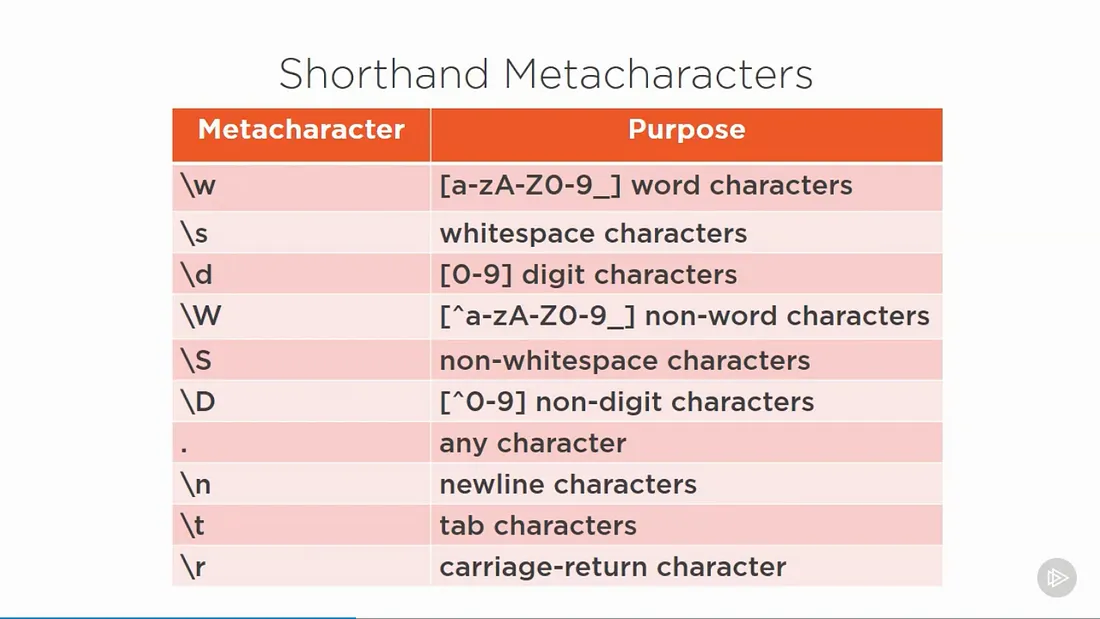

In [111]:
# Cria o CSV de saída
with open("contato_ebac.csv", "w", newline="", encoding="utf-8") as f_out:
    writer = csv.writer(f_out, delimiter=';')
    writer.writerow(["tipo", "numero"])
    
    for row in linhas:
        #Extrai somente numeros
        numero = re.sub(r'\D', '', row)
        if numero:
            #Pesquisei qual regex usar para extrair somente letras
            texto = re.sub(r'[^a-zA-ZáéíóúãõâêîôûçÁÉÍÓÚÃÕÂÊÎÔÛÇ ]', '', row).strip()
            linha = [texto,'+'+numero]
            writer.writerow(linha)
            print(linha)


['WhatsApp', '+551142002991']
['Telefone', '+551130303200']


Com isso finalizamos a atividade :) 